In [1]:
import pandas as pd
import numpy as np
import pdb

In [2]:
def gradient_descent(Y, X, W, A, b, learning_rate = 0.1):
    """
    Y: shape(m,)
    X, shape(n, m)
    W, shape(n, 1)
    A, shape(m,)
    """

    m, _ = Y.shape
    dw = np.dot(X, A - Y) / m
    db = np.sum(A - Y) / m

    assert W.shape == dw.shape, f'W.shape: {W.shape}, dw.shape: {dw.shape}'
    
    W -= learning_rate * dw
    b -= learning_rate * db

    return W, b

In [3]:
def cost_function(Y, A):
    """
    Y: shape(m,)
    A: shape(m,)
    """

    m, _ = Y.shape

    J = - 1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return J

In [4]:
def feed_forward(X, W, b):
    Z = np.dot(W.transpose(), X) + b
    A = 1 / (1 + np.exp(-Z))
    # print(f'A: {A.reshape(-1).shape}')
    return A.reshape(-1)

In [31]:
def logistic_regression(Y, X, num_iteration):
    """
    Y: np.array shape(m,)
    X: np.array shape(n, m)
    num_iteration: int
    """

    m, _ = Y.shape
    assert Y.shape[0] == X.shape[1]

    n, _ = X.shape
    W = np.random.rand(n, 1)
    b = np.random.rand()

    print(f'W.shape: {W.shape}, W: {W}, b: {b}')
    costs = []
    count = 0
    for i in range(num_iteration):
        A = feed_forward(X, W, b)
        J = cost_function(Y, A)
        # print(f'cost: {J}')
        # pdb.set_trace()
        if count % 40 == 39:
            print(f'{count}: {J}')

        costs.append(J)
        W, b = gradient_descent(Y.reshape(-1, 1), X, W, A.reshape(-1, 1), b, learning_rate=.01)
        count += 1
    return W, b, costs

In [6]:
df = pd.read_csv('/Users/danielkuo/Desktop/heart_disease_prediction/framingham.csv')

In [7]:
columns_with_na = df.isna().sum(axis=0) > 0

In [8]:
X = df.loc[:, (~df.columns.isin(['TenYearCHD'])) & (~columns_with_na)].to_numpy()

In [9]:
X.shape

(4238, 8)

In [10]:
Y = df['TenYearCHD'].to_numpy().reshape(-1, 1)

In [11]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [13]:
min_max_scaler = MinMaxScaler()

In [14]:
min_max_scaler.fit(X)

MinMaxScaler()

In [15]:
scaled_X = min_max_scaler.transform(X)

In [34]:
W, b, costs = logistic_regression(Y, scaled_X.transpose(), 1500)

W.shape: (8, 1), W: [[0.62699268]
 [0.75514092]
 [0.01853012]
 [0.84245136]
 [0.24792609]
 [0.92492079]
 [0.94045813]
 [0.59003474]], b: 0.48649007267230293
39: 5436.754555966785
79: 4392.868867595109
119: 3640.1018901478797
159: 3117.9262164896722
199: 2761.0219595903386
239: 2516.335144632835
279: 2346.3673559762165
319: 2226.2208873787627
359: 2139.7019911956354
399: 2076.2651253423746
439: 2028.9610883717762
479: 1993.1347585942244
519: 1965.611616622684
559: 1944.1881699837954
599: 1927.3090124956218
639: 1913.858944417506
679: 1903.0268545623403
719: 1894.2150425690695
759: 1886.9777941039206
799: 1880.9791068424545
839: 1875.963161067751
879: 1871.7334058797728
919: 1868.137556841792
959: 1865.0567065449834
999: 1862.397334227611
1039: 1860.0853837320158
1079: 1858.0618338147747
1119: 1856.279356519202
1159: 1854.6997765556955
1199: 1853.2921256752777
1239: 1852.031142691674
1279: 1850.896109870375
1319: 1849.8699450171698
1359: 1848.9384892338314
1399: 1848.0899453247744
1439: 

In [35]:
W

array([[ 0.03043936],
       [ 0.04370097],
       [-0.54079519],
       [ 0.83859596],
       [-0.01472045],
       [ 0.88053833],
       [ 0.57508109],
       [-0.06662722]])

In [19]:
W

array([[-0.16956514],
       [-0.12771211],
       [-0.39626497],
       [ 0.84110375],
       [-0.06323481],
       [ 0.60521904],
       [ 0.63221448],
       [-0.32161285]])

In [50]:
Z = np.dot(scaled_X, W) + b
A = 1 / (1 + np.exp(-Z))

In [51]:
A

array([[0.19916419],
       [0.20086686],
       [0.1334767 ],
       ...,
       [0.13171902],
       [0.1286155 ],
       [0.20727878]])

In [53]:
fpr, tpr, thresholds = roc_curve(Y.reshape(-1), A.reshape(-1))

In [54]:
fpr.shape

(1079,)

In [55]:
tpr.shape

(1079,)

In [43]:
import plotly.express as exp

In [56]:
df_roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

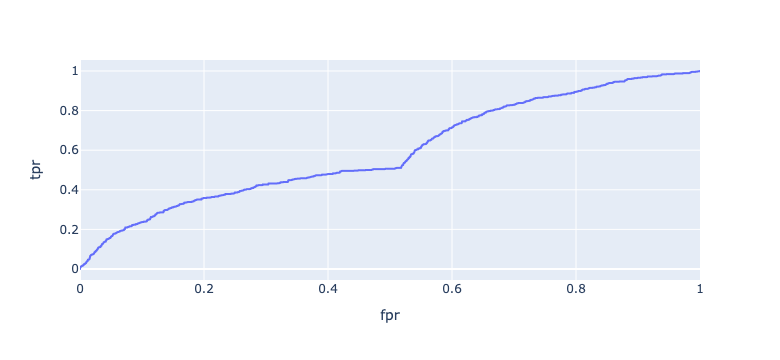

In [57]:
exp.line(df_roc, x= 'fpr', y='tpr', hover_data='thresholds')

In [85]:
cmd = ConfusionMatrixDisplay(confusion_matrix(Y, A >= 0.23))

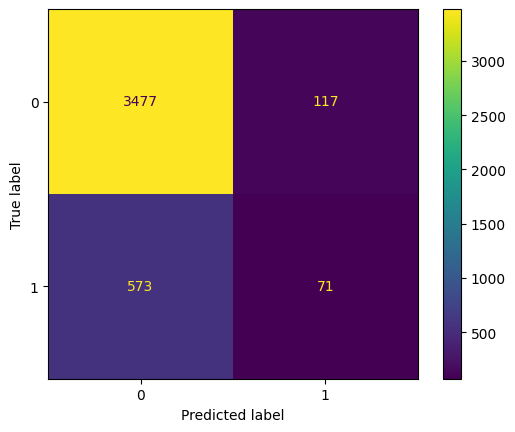

In [86]:
cmd.plot()

In [88]:
f1_score(Y, A >= 0.23)

0.17067307692307693

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression(penalty=None)

In [80]:
lr.fit(scaled_X, Y.reshape(-1))

LogisticRegression(penalty=None)

In [81]:
Y_hat= lr.predict(scaled_X)

In [82]:
Y_hat.shape

(4238,)

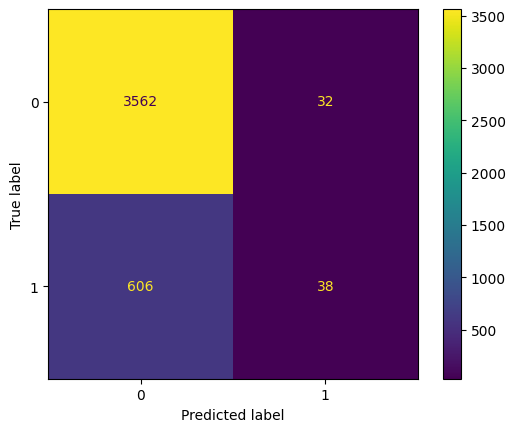

In [83]:
ConfusionMatrixDisplay(confusion_matrix(Y, Y_hat)).plot()

In [84]:
f1_score(Y, Y_hat)

0.10644257703081232

In [148]:
lr.coef_

array([[ 0.5698393 ,  2.35142838,  0.38536738,  1.02219196,  0.2450085 ,
         0.77726714,  3.30483632, -0.34003255]])

In [149]:
W

array([[ 0.06932836],
       [-0.24589683],
       [-0.07926608],
       [ 0.62730107],
       [ 0.15190231],
       [ 0.02514242],
       [ 0.46152773],
       [-0.60755636]])